In [867]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
import descartes
import seaborn as sns; sns.set()
import math 

In [786]:
df = pd.read_csv(r'C:\Users\harr1\Downloads\V0_BENT_LPI.csv')

C:\Users\harr1\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3049: DtypeWarning: Columns (22) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [787]:
df = df.drop('MINDEPTH', axis=1)
df = df.drop('MAXDEPTH', axis=1)
df = df.drop('CALIBRATION', axis = 1)
df= df.dropna()
print (df.head())

   OBJECTID  ROUNDID MISSIONID          REGION_NAME ISLAND  SITEVISITID  \
1     82195       53   OES0512  Mariana Archipelago   Guam          740   
3     82193       53   OES0512  Mariana Archipelago   Guam          740   
4     82192       53   OES0512  Mariana Archipelago   Guam          740   
5     82197       53   OES0512  Mariana Archipelago   Guam          740   
8     82200       53   OES0512  Mariana Archipelago   Guam          740   

     SITE  LATITUDE  LONGITUDE REEF_ZONE  ...  TRANNUM  LPI_SEG  BENTHICCODE  \
1  GUA-01  13.43005  144.63748  Forereef  ...        1      NDR         MOSP   
3  GUA-01  13.43005  144.63748  Forereef  ...        1      NDR         ASSP   
4  GUA-01  13.43005  144.63748  Forereef  ...        1      NDR         ACSP   
5  GUA-01  13.43005  144.63748  Forereef  ...        1      NDR         POCS   
8  GUA-01  13.43005  144.63748  Forereef  ...        2      NDR         ASSP   

           FAMILY        GENUS  CATEGORY_GENUS     BENTHICNAME  \
1 

In [788]:
print ("# of families:", df['FAMILY'].nunique())
print ("Families:", df['FAMILY'].unique())
print ("Region names:", df['REGION_NAME'].unique())
print ("Benthic categories:", df['BENTHICCATEGORY'].nunique())

# of families: 61
Families: ['Acroporidae' 'Pocilloporidae' 'Poritidae' 'Faviidae' 'Dictyotaceae'
 'Halimedaceae' 'Mussidae' 'Caulerpaceae' 'Alcyoniidae' 'Fungiidae'
 'Agariciidae' 'Cardiidae' 'Milleporidae' 'Sphenopidae' 'Siderastreidae'
 'Zoanthidae' 'Merulinidae' 'Siphonocladaceae' 'Valoniaceae'
 'Stylasteridae' 'Dendrophylliidae' 'Briareidae' 'Oculinidae'
 'Helioporidae' 'Corallinaceae' 'Pectiniidae' 'Caryophylliidae'
 'Astrocoeniidae' 'Anadyomenaceae' 'Bonnemaisoniaceae' 'Liagoraceae'
 'Rhodomelaceae' 'Ceramiaceae' 'Dasyaceae' 'Kallymeniaceae'
 'Dasycladaceae' 'Pseudanabaenaceae' 'Boodleaceae' 'Codiaceae'
 'Rhizophyllidaceae' 'Wrangeliaceae' 'Rhodymeniaceae' 'Dumontiaceae'
 'Delesseriaceae' 'Galaxauraceae' 'Peyssonneliaceae' 'Sargassaceae'
 'Nemastomataceae' 'Bryopsidaceae' 'Discosomatidae' 'Halymeniaceae'
 'Udoteaceae' 'Nephtheidae' 'Neogoniolithoideae' 'Cystocloniaceae'
 'Hapalidiaceae' 'Plocamiaceae' 'Stichodactylidae' 'Rhodogorgonaceae'
 'Gelidiellaceae' 'Rhodophycophyta incer

In [789]:
#Get dummies for Acroporidae and REGION_NAME
features = pd.get_dummies(df['FAMILY'])
df['Acro_fam']=np.where((df['FAMILY'].isin(['Acroporidae'])), 1,0)
df['Archipelago']=np.where((df['REGION_NAME'].isin(['Mariana Archipelago'])), 1,0)
df['Remote'] = np.where((df['REGION_NAME'].isin(['Pacific Remote Island Areas'])), 1, 0)
df['Main HI'] = np.where((df['REGION_NAME'].isin(['Main Hawaiian Islands'])),1,0)
df['NW HI'] = np.where((df['REGION_NAME'].isin(['Northwestern Hawaiian Islands'])), 1, 0)
df['Samoa']=np.where((df['REGION_NAME'].isin(['American Samoa'])), 1,0)
df['Corl'] = np.where((df['BENTHICCATEGORY'].isin(['CORL'])), 1,0)

AxesSubplot(0.125,0.125;0.775x0.755)


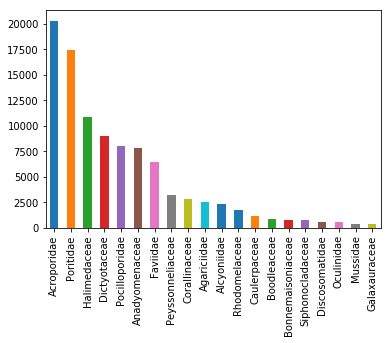

In [790]:

print (df['FAMILY'].value_counts().head(20).plot(kind = 'bar'))


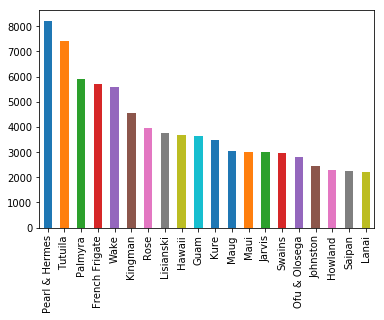

Number of Islands: 43


In [791]:
df['ISLAND'].value_counts().head(20).plot(kind='bar')
plt.show()
print ("Number of Islands:", df['ISLAND'].nunique())

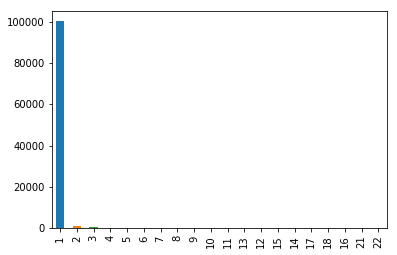

In [792]:

df['COUNT'].value_counts().head(20).plot(kind = 'bar')


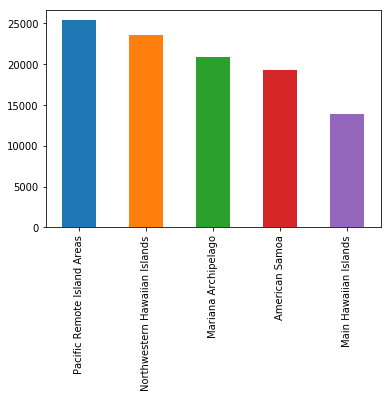

In [793]:

df['REGION_NAME'].value_counts().head(20).plot(kind='bar')


(array([  794.,  2023.,  4987., 16072., 13659., 36836., 28426.]),
 array([2005., 2006., 2007., 2008., 2009., 2010., 2011., 2012.]),
 <a list of 7 Patch objects>)

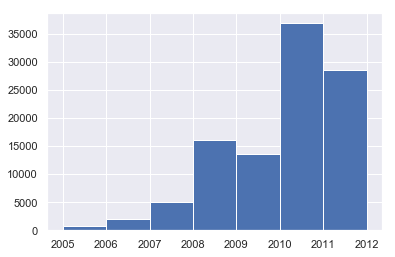

In [884]:
plt.hist(df.OBS_YEAR, bins = 7)

In [794]:
df['BENTHICCATEGORY'].unique()

array(['CORL', 'MALG', 'OCTO', 'INVT', 'ZOAN', 'CYAN', 'ANTH', 'CALG'],
      dtype=object)

In [795]:
#How many unique dates are there per year?

In [796]:
df_agg = df.groupby(['OBS_YEAR','DATE_', 'ISLAND', 'REGION_NAME', 'REEF_ZONE', 'LATITUDE', 'LONGITUDE', 'COUNT'])['COUNT'].sum()


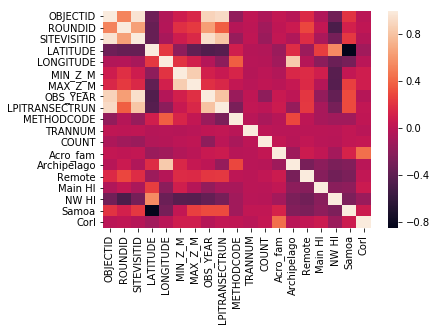

In [797]:
sns.heatmap(df.corr())

In [776]:
print (type('DATE_'))
print (df['DATE_'])

<class 'str'>
1         03-OCT-05
3         03-OCT-05
4         03-OCT-05
8         03-OCT-05
10        03-OCT-05
13        08-OCT-05
23        08-OCT-05
25        08-OCT-05
29        08-OCT-05
31        08-OCT-05
49        04-OCT-05
68        05-OCT-05
79        04-OCT-05
83        04-OCT-05
84        04-OCT-05
89        04-OCT-05
92        04-OCT-05
93        04-OCT-05
98        03-OCT-05
142       18-OCT-05
146       18-OCT-05
158       18-OCT-05
160       18-OCT-05
161       18-OCT-05
165       18-OCT-05
166       18-OCT-05
167       18-OCT-05
170       18-OCT-05
173       18-OCT-05
221       18-OCT-05
            ...    
229098    03-APR-12
229101    03-APR-12
229102    03-APR-12
229103    03-APR-12
229104    03-APR-12
229105    03-APR-12
229113    03-APR-12
229114    03-APR-12
229122    03-APR-12
229124    03-APR-12
229125    03-APR-12
229126    03-APR-12
229127    03-APR-12
229129    03-APR-12
229137    03-APR-12
229139    03-APR-12
229140    03-APR-12
229142    03-APR-12
229143

In [808]:
#convert date from str to numeric

from datetime import datetime

df['Date']= [datetime.strptime(x, '%d-%b-%y') for x in df['DATE_']]

df['Date']= pd.to_numeric(df.Date, errors='coerce')


In [809]:
df = pd.concat([df, df['ISLAND'].str.get_dummies(sep=',')], axis=1)

In [810]:
df = pd.concat([df, df['BENTHICCATEGORY'].str.get_dummies(sep=',')], axis=1)

In [811]:
df = pd.concat([df, df['REEF_ZONE'].str.get_dummies(sep=',')], axis=1)

In [812]:
df =pd.concat([df, df['REGION_NAME'].str.get_dummies(sep=',')], axis=1)

In [813]:
df['OBS_YEAR'] = pd.to_numeric(df.OBS_YEAR, errors='coerce')

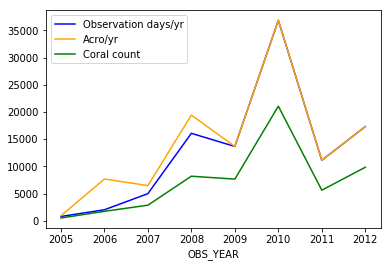

In [832]:
#Bias towards 2010 based on number of observations they made
df.groupby(['OBS_YEAR'])['Date'].count().plot(color = 'blue', label='Observation days/yr')
df.groupby(['OBS_YEAR'])['COUNT'].sum().plot(color = 'orange', label = 'Acro/yr')
df.groupby(['OBS_YEAR'])['Corl'].sum().plot(color = 'green', label = 'Coral count')
plt.legend(loc='upper left')
plt.show()


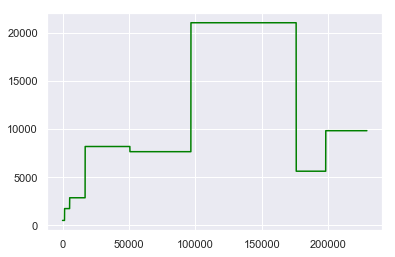

In [876]:
df['Corl/yr'] = df['Corl'].groupby(df['OBS_YEAR']).transform('sum').plot(color='green')



In [872]:
df.dtypes

OBJECTID                           int64
ROUNDID                            int64
MISSIONID                         object
REGION_NAME                       object
ISLAND                            object
SITEVISITID                        int64
SITE                              object
LATITUDE                         float64
LONGITUDE                        float64
REEF_ZONE                         object
DEPTH_BIN                         object
MIN_Z_M                          float64
MAX_Z_M                          float64
DATE_                             object
OBS_YEAR                           int64
LPITRANSECTRUN                     int64
DIVER                             object
METHODCODE                         int64
TRANNUM                            int64
LPI_SEG                           object
BENTHICCODE                       object
FAMILY                            object
GENUS                             object
CATEGORY_GENUS                    object
BENTHICNAME     

In [ ]:
df['Obs/yr'] = df['Date'].groupby(df['OBS_YEAR']).transform('count')

In [814]:
#Without Date
data = df[['Date',
               'LATITUDE', 
           'LONGITUDE', 
           'MIN_Z_M', 
           'MAX_Z_M', 
           'OBS_YEAR', 
           'Acro_fam', 
           'Archipelago', 
           'Remote', 
           'Main HI', 
           'NW HI', 
           'Samoa', 
           'Guam', 'Santa Rosa', 'Wake', 'Hawaii', 'Kauai', 'Kaula', 'Lanai',
       'Lehua', 'Maui', 'Molokai', 'Niihau', 'Oahu', 'French Frigate',
       'Kure', 'Laysan', 'Lisianski', 'Maro', 'Midway', 'Necker',
       'Pearl & Hermes', 'Baker', 'Howland', 'Jarvis', 'Johnston',
       'Kingman', 'Palmyra', 'Ofu & Olosega', 'Rose', 'Swains', 'Tau',
       'Tutuila', 'Agrihan', 'Aguijan', 'Alamagan', 'Asuncion',
       'Farallon de Pajaros', 'Guguan', 'Maug', 'Pagan', 'Rota', 'Saipan',
       'Sarigan', 'Tinian',
           'Forereef', 'Lagoon', 'Protected Slope', 'Backreef',
               'CORL', 'MALG', 'OCTO', 'INVT', 'ZOAN', 'CYAN', 'ANTH', 'CALG'
          ]]
target = df['COUNT']

In [815]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import BernoulliNB
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression


In [816]:
regr = linear_model.LinearRegression()

regr.fit(data, target)

print('Linear Regression:', regr.fit(x_train, y_train).score(x_test, y_test))
print('Coefficients: \n', regr.coef_)
print('Intercept: \n', regr.intercept_)


Linear Regression: 0.06293768401932509
Coefficients: 
 [-9.89286909e-02  1.56582658e-02 -1.04958221e-02  7.78467178e-03
 -2.07153741e-01  6.64588605e-02 -3.11050413e+00 -3.90372157e-03
  1.97730498e+00  2.15642038e+00 -1.01931751e+00 -5.85304085e-01
  7.16635159e-01 -3.62048624e+00 -5.23837059e-01 -2.77883144e-01
  4.85730180e+00 -3.49712236e-01 -2.70630460e-01 -4.12968548e-01
 -3.92053445e-01 -2.35299781e-01 -4.17612155e-01 -2.62447381e-01
  4.86125778e-01 -3.19861825e-02  2.18641380e-01  1.69322924e-01
  2.75774084e-01  1.01710079e+00  2.83888990e-01  2.41279730e-01
  3.08186313e-01  1.15989694e-02  1.81305802e+00  6.62404711e-01
  5.80054778e-01 -2.93829467e-01 -2.77427953e-01  1.21977019e-01
 -2.89635947e-01 -2.80401159e-01 -1.30075487e-01 -5.52384193e-01
 -3.07687729e-01 -2.91513372e-02  5.08847563e-02 -2.97869351e-01
  6.37439479e-02 -2.14266929e-01 -5.70079671e-01 -5.09163826e-01
 -2.80564816e-01 -4.65220566e-01  6.41950110e-02  5.01992144e-02
 -1.80150687e-01  6.57564618e-02]
I

In [817]:
bnb = BernoulliNB() 
lr=LogisticRegression(C=1e9)

x_train, x_test, y_train, y_test = train_test_split(data,target, test_size=.3, random_state = 20)
print(lr.fit(data,target))
print('Log Regression:', lr.fit(x_train, y_train).score(x_test, y_test))
print(bnb.fit(data, target))
print('BNB Regression:', bnb.fit(x_train, y_train).score(x_test, y_test))

C:\Users\harr1\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\harr1\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1000000000.0, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='warn', n_jobs=None, penalty='l2', random_state=None,
          solver='warn', tol=0.0001, verbose=0, warm_start=False)


C:\Users\harr1\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\harr1\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Log Regression: 0.9784370946822308
BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)
BNB Regression: 0.8981841763942932


In [238]:
#with date
data = df_agg[['Date',
               'LATITUDE', 
           'LONGITUDE', 
           'MIN_Z_M', 
           'MAX_Z_M',  
           'Acro_fam', 
           'Archipelago', 
           'Remote', 
           'Main HI', 
           'NW HI', 
           'Samoa', 
           'Guam', 'Santa Rosa', 'Wake', 'Hawaii', 'Kauai', 'Kaula', 'Lanai',
       'Lehua', 'Maui', 'Molokai', 'Niihau', 'Oahu', 'French Frigate',
       'Kure', 'Laysan', 'Lisianski', 'Maro', 'Midway', 'Necker',
       'Pearl & Hermes', 'Baker', 'Howland', 'Jarvis', 'Johnston',
       'Kingman', 'Palmyra', 'Ofu & Olosega', 'Rose', 'Swains', 'Tau',
       'Tutuila', 'Agrihan', 'Aguijan', 'Alamagan', 'Asuncion',
       'Farallon de Pajaros', 'Guguan', 'Maug', 'Pagan', 'Rota', 'Saipan',
       'Sarigan', 'Tinian',
           'Forereef', 'Lagoon', 'Protected Slope', 'Backreef'
          ]]
target = df['COUNT']

In [227]:
bnb = BernoulliNB() 
lr=LogisticRegression(C=1e9)

x_train, x_test, y_train, y_test = train_test_split(data,target, test_size=.3, random_state = 20)
print(lr.fit(data,target))
print('Log Regression:', lr.fit(x_train, y_train).score(x_test, y_test))
print(bnb.fit(data, target))
print('BNB Regression:', bnb.fit(x_train, y_train).score(x_test, y_test))

C:\Users\harr1\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\harr1\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1000000000.0, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='warn', n_jobs=None, penalty='l2', random_state=None,
          solver='warn', tol=0.0001, verbose=0, warm_start=False)


C:\Users\harr1\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\harr1\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Log Regression: 0.9784370946822308
BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)
BNB Regression: 0.9784046692607004


In [823]:
print ('Bernoulli prediction:', bnb.predict(data))
print('Log regr prediction:', lr.predict(data))

Bernoulli prediction: [1 1 1 ... 2 2 2]
Log regr prediction: [1 1 1 ... 1 1 1]


In [232]:
regr = linear_model.LinearRegression()
regr.fit(data, target)
print (regr.coef_)
print (regr.intercept_)
print (regr.fit(x_train, y_train).score(x_test, y_test))
print (regr.score(data, target))


[-4.75700570e-18 -9.38149260e-03 -1.36428941e-04  6.60230980e-04
  1.22403212e-03  2.66644457e-05  2.87801997e-05  1.29872205e-04
 -6.46794578e-05 -2.52401418e-04  1.58428471e-04  4.66964078e-06
 -5.27881480e-07 -2.90262737e-05 -2.39994957e-05 -8.47688091e-06
 -3.65530547e-07 -3.38406260e-06 -2.87767190e-06 -1.24135463e-05
 -5.99115675e-06 -1.04199602e-06 -6.12911710e-06 -8.52080312e-05
 -1.39560335e-05 -1.04179091e-05 -2.17376984e-05 -1.84917562e-05
 -1.88221864e-05 -7.18485450e-07 -8.30493172e-05  1.24447891e-05
  1.26960343e-05  3.16546892e-05  1.18731887e-05  3.91199434e-05
  5.11098335e-05  1.43068354e-05  4.26291262e-05  3.24796954e-05
  9.20937206e-06  5.98034421e-05  3.61547016e-06  6.37813527e-07
 -1.12364578e-06  4.59085686e-06  2.39100516e-06  3.99899722e-07
  8.43697699e-06  1.50777132e-06 -1.54218174e-06 -6.69258900e-07
  1.89229268e-06  4.50144038e-06  1.06971647e-04 -5.58796652e-05
 -3.63107801e-05 -1.47812016e-05]
7.21005238455894
0.06293768401932476
-1.4322059647640165

In [234]:
#without date (better)
regr = linear_model.LinearRegression()
regr.fit(data, target)
print (regr.coef_)
print (regr.intercept_)
print (regr.fit(x_train, y_train).score(x_test, y_test))
print (regr.score(data, target))

[-0.08560671  0.01100352 -0.01052316  0.00822912 -0.2001136   0.07229047
 -2.17903824 -0.07818174  1.50185166  1.81927296 -1.06390465 -0.44170703
  0.46770669 -2.44523677 -0.46209981 -0.25855553  4.09865962 -0.31256122
 -0.25367914 -0.36499888 -0.35289265 -0.19889313 -0.39312759 -0.43131148
  0.19426872 -0.23281511 -0.02788515 -0.02550562 -0.0144313   2.34579931
  0.01115358  0.08933844  0.11360899 -0.11949219  1.43384698  0.45743915
  0.39231365 -0.29284421 -0.27664542  0.09528908 -0.30816114 -0.28154295
 -0.05744819 -0.43229502 -0.22956707  0.02650992  0.0961467  -0.21786811
  0.09783289 -0.13927366 -0.40940625 -0.38891039 -0.19597331 -0.35478541
  0.05932014  0.05302321 -0.17020601  0.05786266]
405.4158588690983
0.06293768401932476
0.06930618681123257


In [136]:
from sklearn.model_selection import cross_val_score
cross_val_score(regr, data, target, cv=5)

array([0.12509708, 0.00919349, 0.        , 0.        , 0.        ])

In [818]:
ridgeregr = linear_model.Ridge(alpha = 10, fit_intercept = False)
ridgeregr.fit(x_train, y_train)
print (ridgeregr.fit(x_train, y_train).score(x_test, y_test))
print (cross_val_score(ridgeregr, data, target, cv = 5))



C:\Users\harr1\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:125: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number2.547225e-41
  overwrite_a=True).T
C:\Users\harr1\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:125: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number2.547225e-41
  overwrite_a=True).T


0.06430031203063868


C:\Users\harr1\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:125: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number2.232563e-41
  overwrite_a=True).T
C:\Users\harr1\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:125: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number2.190856e-41
  overwrite_a=True).T
C:\Users\harr1\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:125: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number2.252104e-41
  overwrite_a=True).T
C:\Users\harr1\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:125: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number2.257281e-41
  overwrite_a=True).T


[0.04149344 0.00791041 0.         0.         0.        ]


C:\Users\harr1\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:125: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number2.303415e-41
  overwrite_a=True).T


In [235]:
#Without date (worse)
ridgeregr = linear_model.Ridge(alpha = 10, fit_intercept = False)
ridgeregr.fit(x_train, y_train)
print (ridgeregr.fit(x_train, y_train).score(x_test, y_test))
print (cross_val_score(ridgeregr, data, target, cv = 5))


0.0073739885150989615
[-0.02699628 -0.0102408   0.          0.          0.        ]


In [819]:
from sklearn.naive_bayes import MultinomialNB
MNB= MultinomialNB()

MNB.fit(x_train,y_train).score(x_test, y_test)

ValueError: Input X must be non-negative

## Seems like Log and BNB regressions perform really well and linear regression and ridge regressions consistently perform poorly.

In [194]:
from ndbc import Station
from datetime import datetime
import buoypy

ModuleNotFoundError: No module named 'buoypy'

In [183]:
Buoys = {'Guam': 52202, 'Santa Rosa': 46069, 'Wake': 1890000, 'Hawaii': 51206, 'Kauai': 51208, 'Kaula': 51208, 'Lanai': 51213,
         'Lehua': 51208, 'Maui':51205, 'Molokai': 51026, 'Niihau':51208, 'Oahu': 51202}
#Deleted French Frigate from data as NOAA does not have a close buoy

In [199]:
station = Station(52202).lat
print(station)

13.684


In [202]:
Station.getmembers()

AttributeError: type object 'Station' has no attribute 'getmembers'

In [207]:
import inspect
inspect.getmembers(Station)

[('__class__', type),
 ('__delattr__', <slot wrapper '__delattr__' of 'object' objects>),
 ('__dict__',
  mappingproxy({'__module__': 'ndbc.station',
                '__doc__': 'NDBC Station class.',
                '__init__': <function ndbc.station.Station.__init__(self, station_id, starttime=None, endtime=None)>,
                '_get_info': <function ndbc.station.Station._get_info(self)>,
                'get_stdmet': <function ndbc.station.Station.get_stdmet(self, starttime, endtime)>,
                '_get_stdmet_realtime': <function ndbc.station.Station._get_stdmet_realtime(self)>,
                '__dict__': <attribute '__dict__' of 'Station' objects>,
                '__weakref__': <attribute '__weakref__' of 'Station' objects>})),
 ('__dir__', <method '__dir__' of 'object' objects>),
 ('__doc__', 'NDBC Station class.'),
 ('__eq__', <slot wrapper '__eq__' of 'object' objects>),
 ('__format__', <method '__format__' of 'object' objects>),
 ('__ge__', <slot wrapper '__ge__' of 'o

In [208]:
df_agg['BuoyNo'] = df_agg['ISLAND'].map(Buoys)
print(df_agg.describe())

            OBJECTID        ROUNDID    SITEVISITID       LATITUDE  \
count  102797.000000  102797.000000  102797.000000  102797.000000   
mean   127142.162155      47.270378    2720.260377      11.790533   
std     79747.018105      13.621488    1145.527734      14.384323   
min         7.000000       1.000000     740.000000     -14.559639   
25%     57216.000000      38.000000    1800.000000       0.814666   
50%    109236.000000      42.000000    2517.000000      18.096650   
75%    203166.000000      59.000000    3485.000000      21.889760   
max    257626.000000      68.000000    5058.000000      28.453650   

           LONGITUDE        MIN_Z_M        MAX_Z_M       OBS_YEAR  \
count  102797.000000  102797.000000  102797.000000  102797.000000   
mean      -85.846523      10.871815      13.363007    2009.736442   
std       138.954342       4.046064       4.255341       1.554034   
min      -178.378433       1.000000       1.000000    2005.000000   
25%      -170.759450       9.0000

In [ ]:

'French Frigate': SNDP5,  'Kure' 'Laysan'
 'Lisianski' 'Maro' 'Midway' 'Necker' 'Pearl & Hermes' 'Baker' 'Howland'
 'Jarvis' 'Johnston' 'Kingman' 'Palmyra' 'Ofu & Olosega' 'Rose' 'Swains'
 'Tau' 'Tutuila' 'Agrihan' 'Aguijan' 'Alamagan' 'Asuncion'
 'Farallon de Pajaros' 'Guguan' 'Maug' 'Pagan' 'Rota' 'Saipan' 'Sarigan'
 'Tinian'}

## Shared buoys: kauai, kaula, lehua, niihau

In [91]:
#Tiago code to group

df.groupby[x for x in df.columns if x != 'COUNT']



SyntaxError: invalid syntax (<ipython-input-91-3115ff73ce79>, line 3)